### 1. Import all requisite libraries

In [1]:
# Import Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### 2. Read Data file from location

In [2]:
# Read Data File
veh_df = pd.read_csv("vehicle.csv")

### 3. Check whether the file is loaded correctly

In [3]:
veh_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

#### Observation :
* It is evident that there are some missing values in data; hence needs further investigation

### 4. Get a high level info of the various attributes

In [4]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### Observation :
* 'class' column alone is of type object - might need transformation

In [59]:
veh_df.shape

(846, 19)

In [57]:
veh_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [60]:
veh_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [5]:
veh_df['class']=veh_df['class'].astype('category')

In [6]:
veh_df_rev = veh_df.copy(deep=True)

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
class_cat = le.fit_transform(veh_df["class"])

In [9]:
#initialize the encoded categorical columns
veh_df_rev['class_cat'] = class_cat

In [10]:
#drop the old categorical columns from dataframe
dummy_field = ['class']
veh_df_rev = veh_df_rev.drop(dummy_field, axis = 1)

In [11]:
# Re-index the new dataframe and view it
veh_df_rev = veh_df_rev.reindex(['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio',
                                 'max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity',
                                 'max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration',
                                 'scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio','class_cat'], axis= 1)
veh_df_rev.head(10)




compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class_cat  
0             187.0            197          2  
1             189.0            199          2  
2             188.0            196          1  
3             199.0            207          2  
4      

In [12]:
veh_df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

### 5. Splitting data into independant and dependant variables

In [13]:
# independant variables
X = veh_df_rev.drop(['class_cat'], axis=1)
# the dependent variable
y = veh_df_rev[['class_cat']]

### 6. Checking for missing / null values amoungst independant variables
* .isnull().sum() function gives a count of the number of missing values

In [14]:
    veh_df_rev.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class_cat                      0
dtype: int64

#### Observation :
* missing value treatment needs to be carried out since majority of the columns seems to have atleast one missing value
* Imputing the missing values with the Median of their repective columns would be the strategy used here

### 7. Calculate the repective column Medians

In [15]:
veh_df_rev.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
class_cat                        1.0
dtype: float64

### 8. Replacing all missing values with Median

In [16]:
medianFiller = lambda x: x.fillna(x.median())
X = X.apply(medianFiller,axis=0)

### 9. View the table after replacement

In [17]:
X.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183  
5             181.0      

## Univariate Analysis
### 10. Analyse the boxplots for each of the independant variable

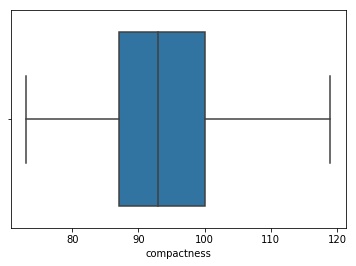

In [18]:
sns.boxplot(X['compactness'])

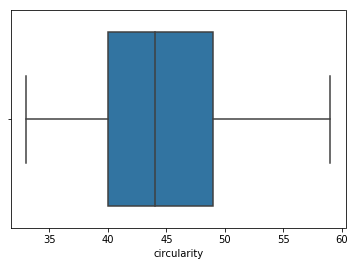

In [19]:
sns.boxplot(X['circularity'])

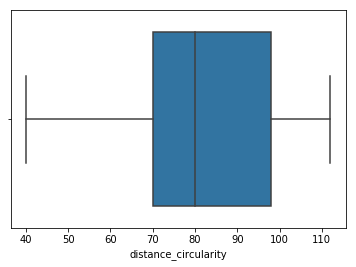

In [20]:
sns.boxplot(X['distance_circularity'])


#### Observation : data is right skewed

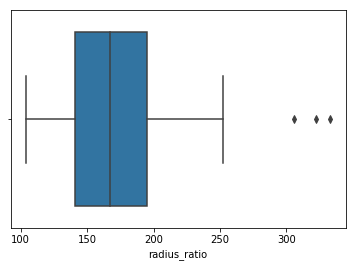

In [21]:
sns.boxplot(X['radius_ratio'])


#### Observation : presence of Outliers in data

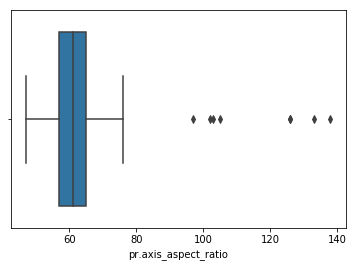

In [22]:
sns.boxplot(X['pr.axis_aspect_ratio'])


#### Observation : presence of Outliers in data

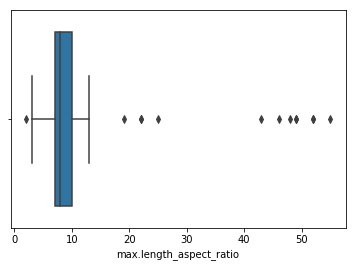

In [23]:
sns.boxplot(X['max.length_aspect_ratio'])


#### Observation : presence of Outliers in data

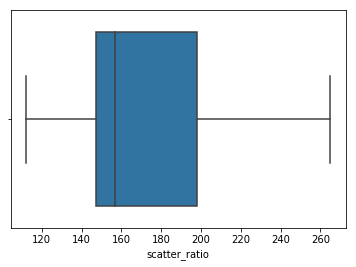

In [24]:
sns.boxplot(X['scatter_ratio'])


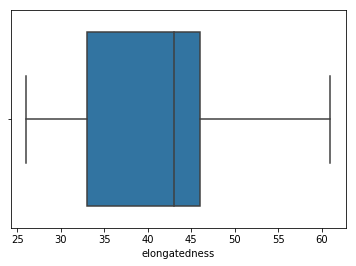

In [25]:
sns.boxplot(X['elongatedness'])


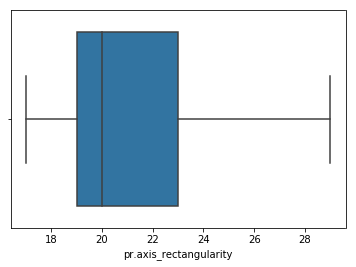

In [26]:
sns.boxplot(X['pr.axis_rectangularity'])


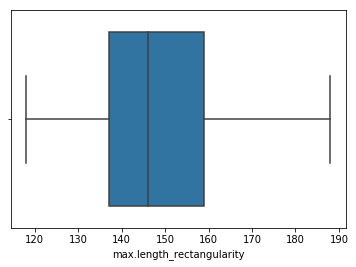

In [27]:
sns.boxplot(X['max.length_rectangularity'])


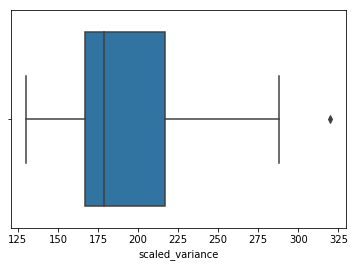

In [28]:
sns.boxplot(X['scaled_variance'])


#### Observation : presence of Outlier in data

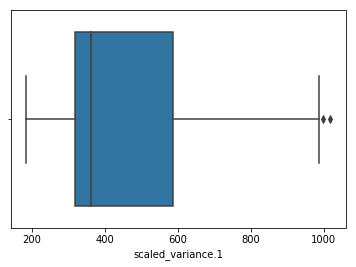

In [29]:
sns.boxplot(X['scaled_variance.1'])


#### Observation : presence of Outliers in data

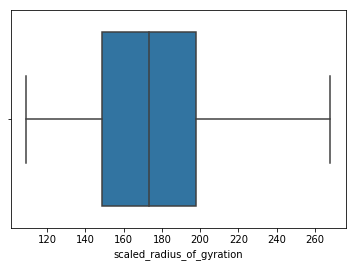

In [30]:
sns.boxplot(X['scaled_radius_of_gyration'])


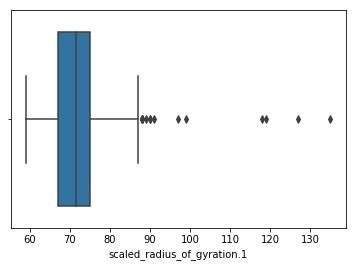

In [31]:
sns.boxplot(X['scaled_radius_of_gyration.1'])


#### Observation : presence of Outliers in data

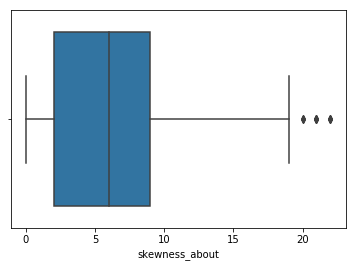

In [32]:
sns.boxplot(X['skewness_about'])


#### Observation : presence of Outliers in data

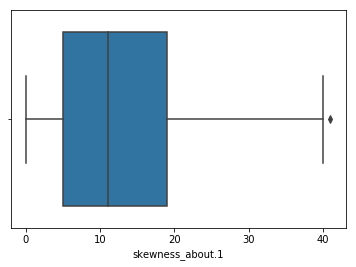

In [33]:
sns.boxplot(X['skewness_about.1'])


#### Observation : presence of Outlier in data

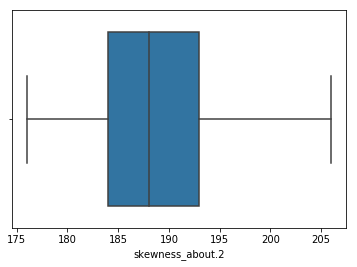

In [34]:
sns.boxplot(X['skewness_about.2'])


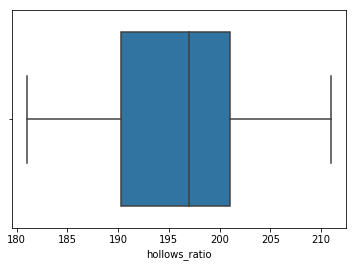

In [35]:
sns.boxplot(X['hollows_ratio'])

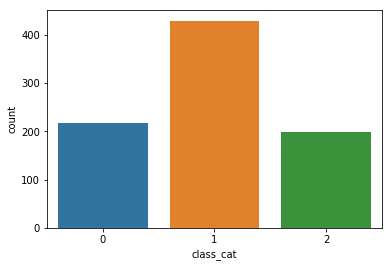

In [36]:
sns.countplot(y['class_cat'])

#### Obervation : since the two cars cannot be distinguished from one another, it is seen here that there is a skew in the Cars class count and this can be ignored

### 11. Outlier treatment 
* Replace Outliers with Median of the respective columns

In [37]:
median_radius_ratio = float(X["radius_ratio"].median())
X["radius_ratio"] = np.where(X["radius_ratio"] > 300, median_radius_ratio, X["radius_ratio"])

median_axis_aspect_ratio = float(X["pr.axis_aspect_ratio"].median())
X["pr.axis_aspect_ratio"] = np.where(X["pr.axis_aspect_ratio"] > 80, median_axis_aspect_ratio, X["pr.axis_aspect_ratio"])

median_max_length_aspect_ratio = float(X["max.length_aspect_ratio"].median())
X["max.length_aspect_ratio"] = np.where(X["max.length_aspect_ratio"] > 20, median_max_length_aspect_ratio, X["max.length_aspect_ratio"])

median_scaled_variance = float(X["scaled_variance"].median())
X["scaled_variance"] = np.where(X["scaled_variance"] > 300, median_scaled_variance, X["scaled_variance"])

median_scaled_variance_1 = float(X["scaled_variance.1"].median())
X["scaled_variance.1"] = np.where(X["scaled_variance.1"] > 1000, median_scaled_variance_1, X["scaled_variance.1"])

median_scaled_radius_of_gyration_1 = float(X["scaled_radius_of_gyration.1"].median())
X["scaled_radius_of_gyration.1"] = np.where(X["scaled_radius_of_gyration.1"] > 100, median_scaled_radius_of_gyration_1, X["scaled_radius_of_gyration.1"])

median_skewness_about = float(X["skewness_about"].median())
X["skewness_about"] = np.where(X["skewness_about"] > 20, median_skewness_about, X["skewness_about"])

median_skewness_about_1 = float(X["skewness_about.1"].median())
X["skewness_about.1"] = np.where(X["skewness_about.1"] > 40, median_skewness_about_1, X["skewness_about.1"])

## Bivariate Analysis

### 12. Correlation Matrix

In [38]:
X.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.488333     0.552281              0.656239   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.809868     0.831744              0.885193   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.259632     0.052129             -0.246364   
skewness_about                  0.202827     0.137404              0.101319   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.462011              0.165567   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.757296              0.187489   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.363521             -0.316046   
skewness_about                   0.039959             -0.055437   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.488333       0.812620   
circularity                                 0.552281       0.847938   
distance_circularity                        0.656239       0.905076   
radius_ratio                                0.462011       0.769941   
pr.axis_aspect_ratio                        0.165567       0.194195   
max.length_aspect_ratio                     1.000000       0.482393   
scatter_ratio                               0.482393       1.000000   
elongatedness                              -0.498118      -0.971601   
pr.axis_rectangularity                      0.478594       0.989751   
max.length_rectangularity                   0.633381       0.809083   
scaled_variance                             0.396666       0.960883   
scaled_variance.1                           0.447573       0.986503   
scaled_radius_of_gyration                   0.391698       0.799875   
scaled_radius_of_gyration.1                -0.342375      -0.011224   
skewness_about                              0.078313       0.064227   
skewness_about.1                            0.140602       0.211647   
skewness_about.2                            0.

### 13. Heat Map is a better representation

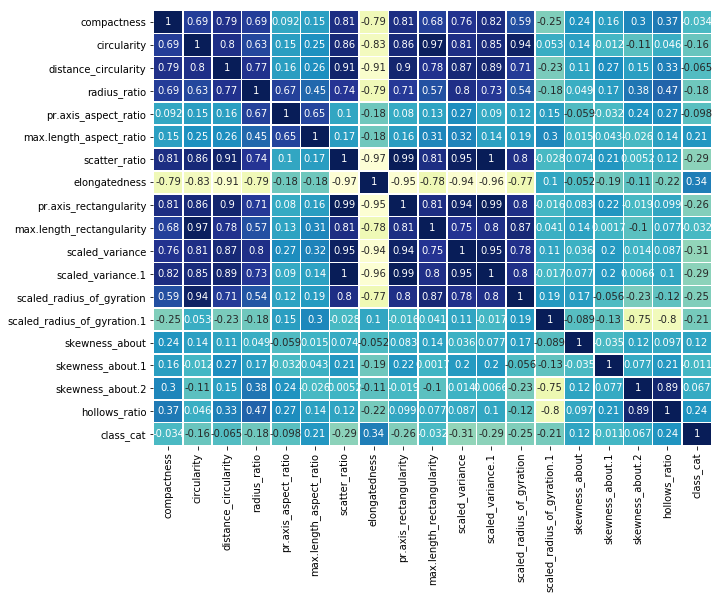

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(veh_df_rev.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### Observation : Strong correlation between variuos attributes does exists
* This calls for a PCA to be performed since the number of irrelavant / redundant attributes that are present can be held back from being considered to part of the final model building task

### 14. Pair Panel analysis

C:\Users\ayshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ayshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ayshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ayshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


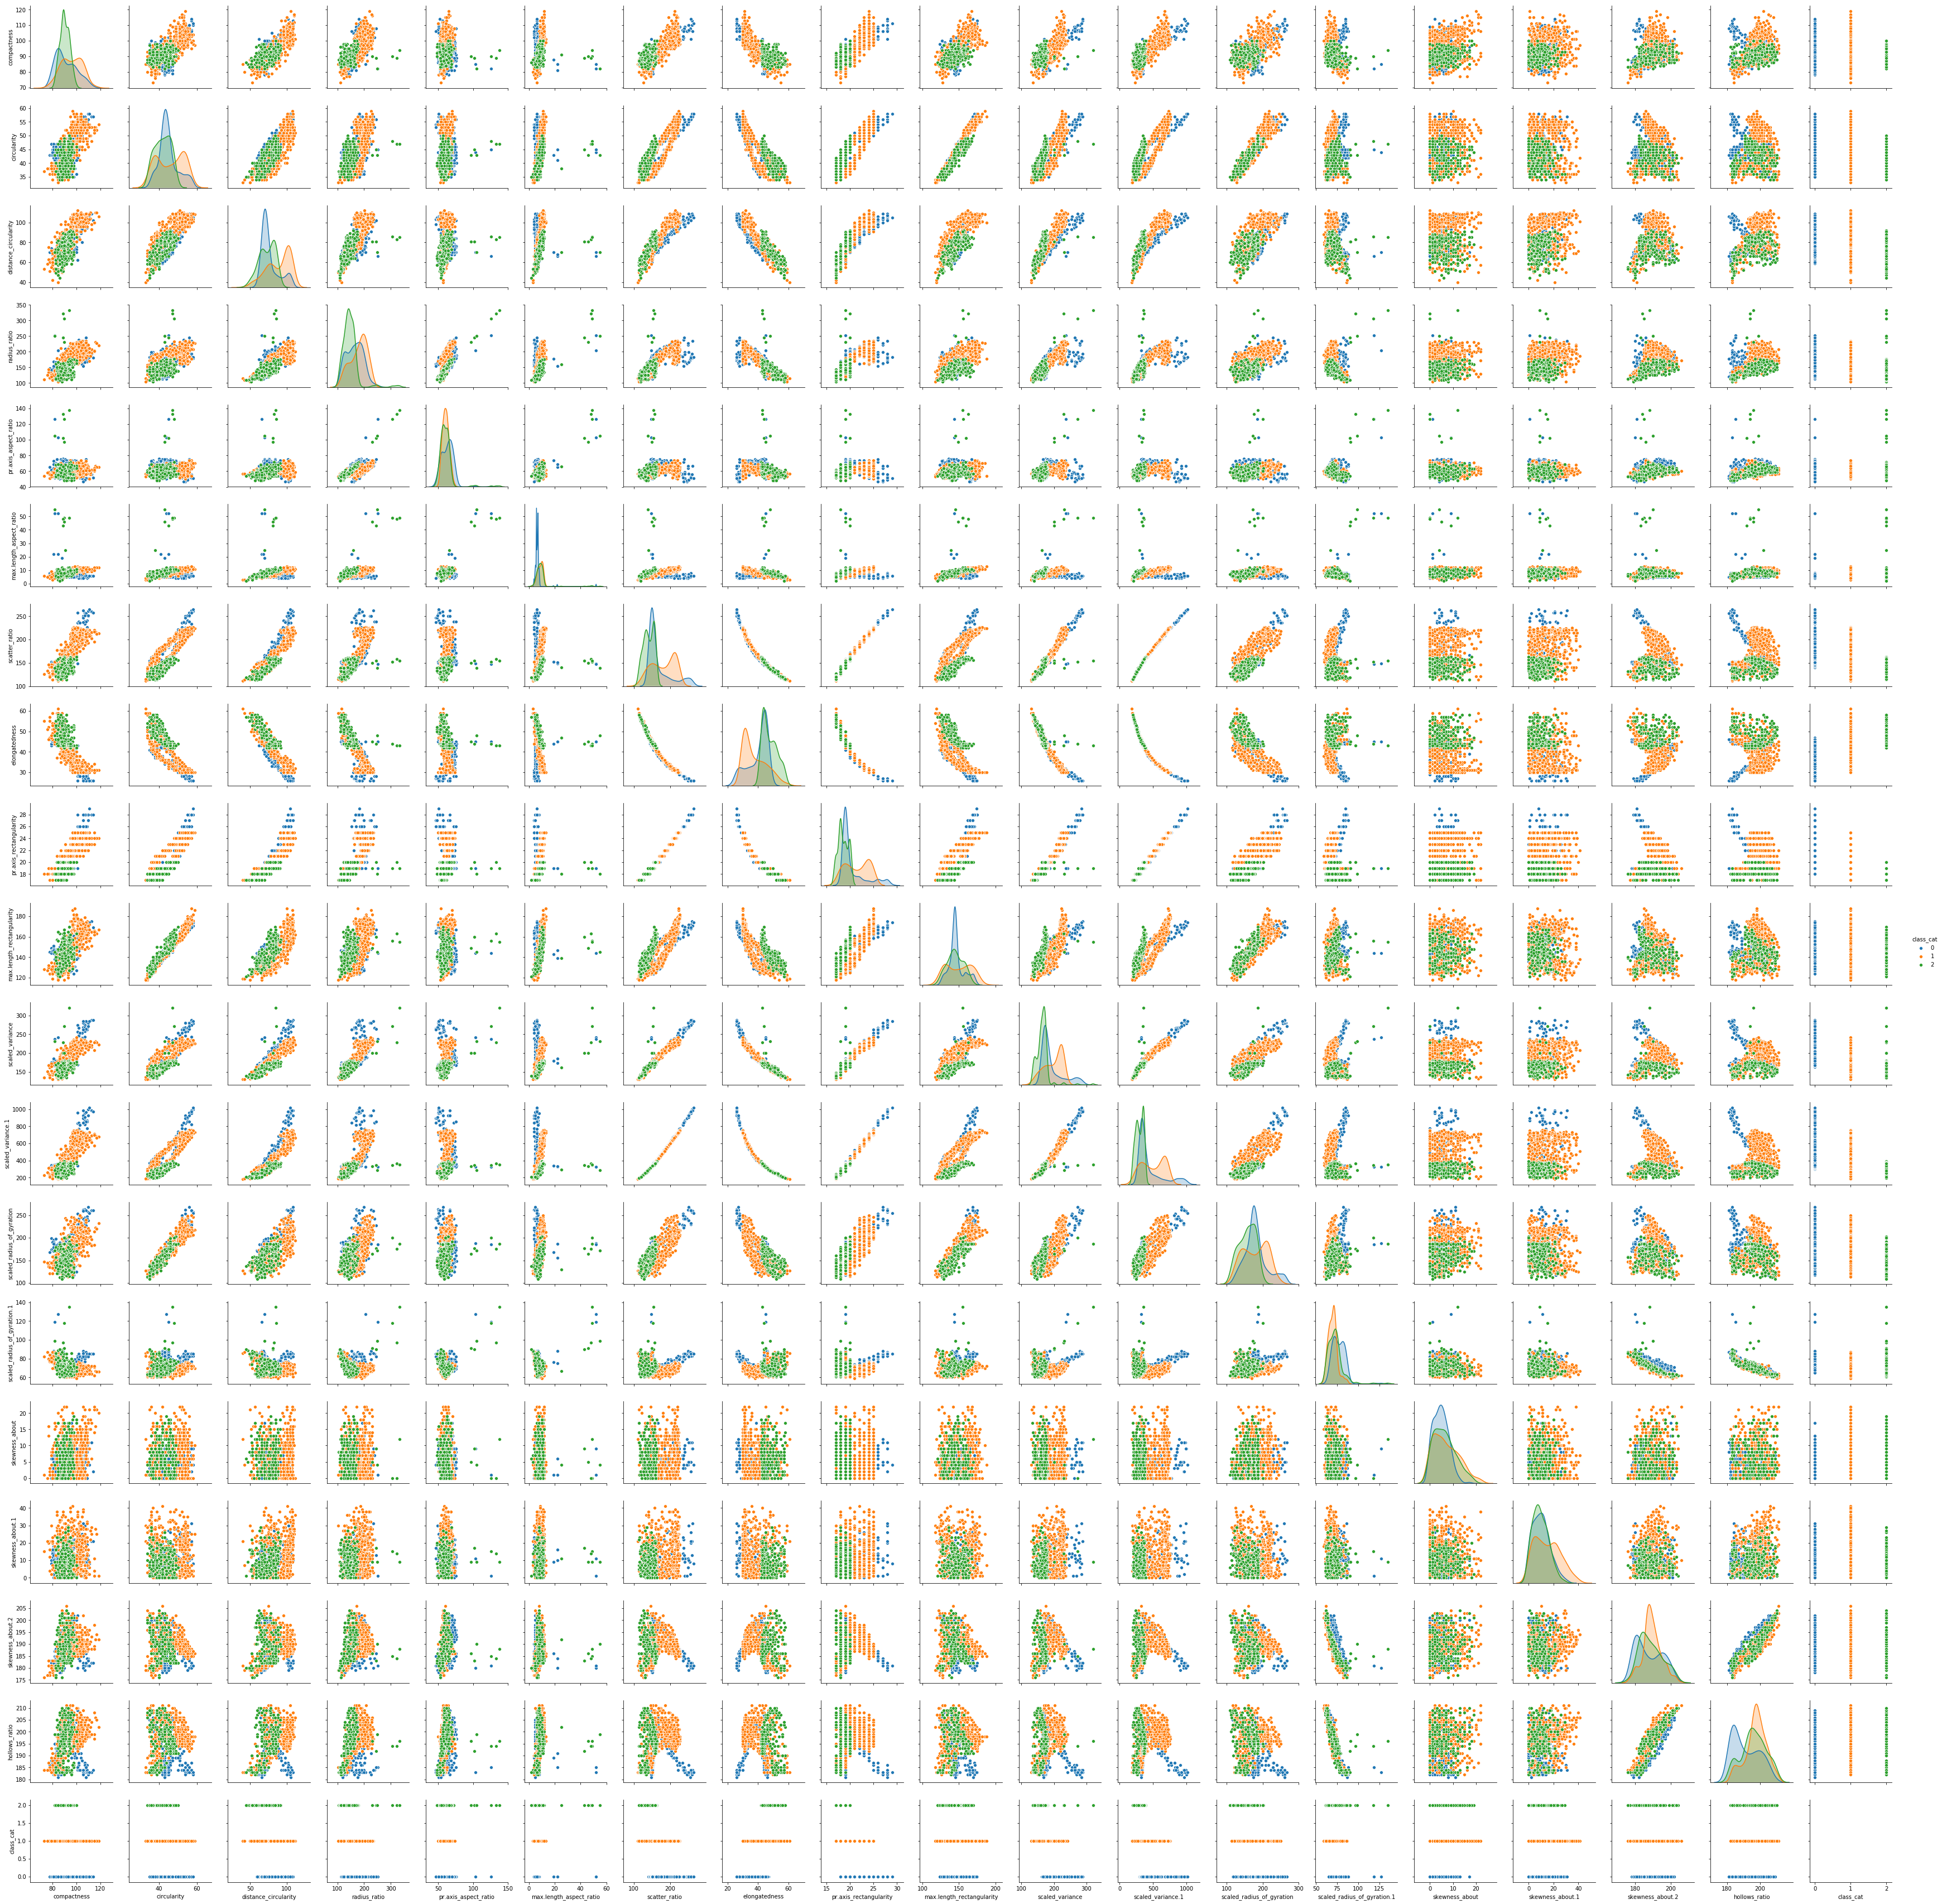

In [41]:
sns.pairplot(veh_df_rev, diag_kind="kde", hue = "class_cat")

### 15. Standardising the attributes

In [40]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 16. Generate the Co-variance Matrix and then do a Principle Component Analysis

In [41]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

from sklearn.decomposition import PCA
pca = PCA(n_components=18, random_state=10)
pca.fit(X_sd)

#generating the eigen values and the eigen vectors
## e_vals, e_vecs = np.linalg.eig(cov_matrix)
## print('Eigenvectors \n%s' %e_vecs)
## print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.48891058
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.8108263
   0.58593517 -0.25993908  0.20306732  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.55293494
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.83272814
   0.92691166  0.05219054  0.1375665  -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.65701546
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88624082
   0.70660663 -0.24665603  0.10143906  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46255732
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.75819221
   0.55142559 -0.36395093  0.04000588  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.16576252
   0.19442484

PCA(copy=True, iterated_power='auto', n_components=18, random_state=10,
  svd_solver='auto', tol=0.0, whiten=False)

### 17. Find the Eigen Values

In [42]:
## Eigen Value
print(pca.explained_variance_)

[9.74826655e+00 3.32864055e+00 1.20035668e+00 1.12947693e+00
 8.86195303e-01 6.70884617e-01 3.20526001e-01 2.28452586e-01
 1.30660701e-01 9.31385056e-02 6.86486105e-02 6.66439282e-02
 4.78143459e-02 3.17686612e-02 2.72343238e-02 2.03121978e-02
 1.75808491e-02 4.70043659e-03]


### 18. Find the Eigen Vectors

In [43]:
## Eigen Vectors
print(pca.components_)

[[ 0.27257086  0.28725341  0.30238722  0.26962898  0.09799608  0.19246539
   0.3106602  -0.30911497  0.30740349  0.27800701  0.29988042  0.30621876
   0.26331403 -0.04611031  0.03669422  0.05869087  0.03819072  0.08456806]
 [-0.08808772  0.13162419 -0.04715404 -0.19336972 -0.25853286 -0.11069669
   0.07456402 -0.01179844  0.08703505  0.1227083   0.08059458  0.07627086
   0.21139928  0.49910068 -0.02405311 -0.0934175  -0.50376797 -0.50861029]
 [ 0.04176215  0.19976536 -0.06158381 -0.06330635  0.04794559  0.14692647
  -0.10691912  0.09076824 -0.10387359  0.21194781 -0.14493702 -0.10796925
   0.20310585 -0.07750365  0.57346041 -0.66143193  0.05986934  0.03774713]
 [ 0.14206948 -0.04241008  0.10896965 -0.25829182 -0.62184718  0.24686919
   0.01220435  0.06007589  0.03733348  0.0329969  -0.05765848  0.00824971
  -0.08540299 -0.12785564  0.46686764  0.4386686  -0.02785475  0.08570256]
 [-0.14800109  0.14152925  0.08292503 -0.13557565 -0.09804286  0.66420355
  -0.08854554  0.07956974 -0.08487

### 19. Print and plot (elbow plot) the variance explained by PCA

[5.40930210e-01 1.84705888e-01 6.66076567e-02 6.26745472e-02
 4.91748773e-02 3.72273116e-02 1.77859516e-02 1.26768082e-02
 7.25034755e-03 5.16824516e-03 3.80930364e-03 3.69806405e-03
 2.65321265e-03 1.76283942e-03 1.51122955e-03 1.12712156e-03
 9.75559333e-04 2.60826695e-04]
[0.54093021 0.7256361  0.79224375 0.8549183  0.90409318 0.94132049
 0.95910644 0.97178325 0.9790336  0.98420184 0.98801115 0.99170921
 0.99436242 0.99612526 0.99763649 0.99876361 0.99973917 1.        ]


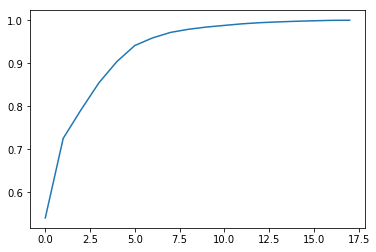

In [44]:
## Percentage of variation explained
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#### Observation : It has to be noted that 7 principle components are required to capture 95% variance for the PCA

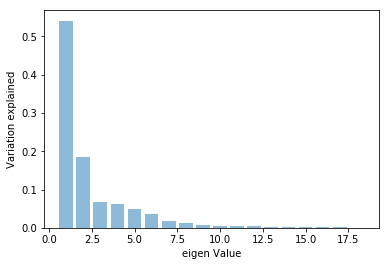

In [45]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

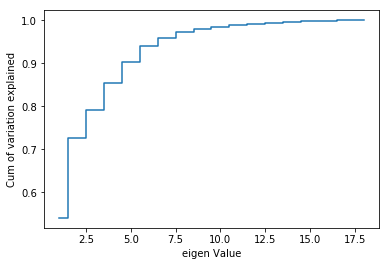

In [46]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

### 20. Re-evaluate a PCA with just 7 components

In [47]:
pca7 = PCA(n_components=7, random_state = 10)
pca7.fit(X_sd)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
print(np.cumsum(pca7.explained_variance_ratio_))
Xpca7 = pca7.transform(X_sd)

[[ 0.27257086  0.28725341  0.30238722  0.26962898  0.09799608  0.19246539
   0.3106602  -0.30911497  0.30740349  0.27800701  0.29988042  0.30621876
   0.26331403 -0.04611031  0.03669422  0.05869087  0.03819072  0.08456806]
 [-0.08808772  0.13162419 -0.04715404 -0.19336972 -0.25853286 -0.11069669
   0.07456402 -0.01179844  0.08703505  0.1227083   0.08059458  0.07627086
   0.21139928  0.49910068 -0.02405311 -0.0934175  -0.50376797 -0.50861029]
 [ 0.04176215  0.19976536 -0.06158381 -0.06330635  0.04794559  0.14692647
  -0.10691912  0.09076824 -0.10387359  0.21194781 -0.14493702 -0.10796925
   0.20310585 -0.07750365  0.57346041 -0.66143193  0.05986934  0.03774713]
 [ 0.14206948 -0.04241008  0.10896965 -0.25829182 -0.62184718  0.24686919
   0.01220435  0.06007589  0.03733348  0.0329969  -0.05765848  0.00824971
  -0.08540299 -0.12785564  0.46686764  0.4386686  -0.02785475  0.08570256]
 [-0.14800109  0.14152925  0.08292503 -0.13557565 -0.09804286  0.66420355
  -0.08854554  0.07956974 -0.08487

### 21. Split data into Train and Test

In [49]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(Xpca7, y, test_size = 0.2, random_state = 10)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 7), (170, 7), (676, 1), (170, 1))

### 22. Build an SVM model using the new 7 Principle Components instead of the original 18 attributes

In [54]:
from sklearn.svm import SVC


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': ['auto'],##[1e-3, 1e-4],
                     'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=10,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print ('After PCA score', clf.score(X_test, y_test))
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

After PCA score 0.9174436674436673
Best parameters set found on development set:

{'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}

Grid scores on development set:

0.168 (+/-0.004) for {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
0.830 (+/-0.103) for {'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
0.916 (+/-0.045) for {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
0.914 (+/-0.055) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.805 (+/-0.104) for {'C': 0.01, 'kernel': 'linear'}
0.816 (+/-0.100) for {'C': 0.05, 'kernel': 'linear'}
0.833 (+/-0.091) for {'C': 0.5, 'kernel': 'linear'}
0.834 (+/-0.093) for {'C': 1, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.93      0.92      0.93        89
           2       0.82      0.86      0.84        37

   micro avg

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

After PCA score 0.913671332210658
Best parameters set found on development set:

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

Grid scores on development set:

0.333 (+/-0.000) for {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
0.569 (+/-0.098) for {'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
0.910 (+/-0.043) for {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
0.916 (+/-0.055) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.811 (+/-0.116) for {'C': 0.01, 'kernel': 'linear'}
0.828 (+/-0.100) for {'C': 0.05, 'kernel': 'linear'}
0.847 (+/-0.086) for {'C': 0.5, 'kernel': 'linear'}
0.852 (+/-0.084) for {'C': 1, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.93      0.90      0.91        89
           2       0.80      0.86      0.83        37

   micro avg   

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

#### Observation :
#### * Accuracy : 91.3%
#### * Best Parameters set : {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [55]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print ('After PCA score', model.score(X_test, y_test))

After PCA score 0.7411764705882353


C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
